# Log-Log Regression

Linear Regression is quite capable of solving non-linear problems if you know how to properly pre-process your data. Let's look at a few types of datasets we can regress by using logarithmic transformations.

## Regular Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

First let's analyze a typical linear dataset

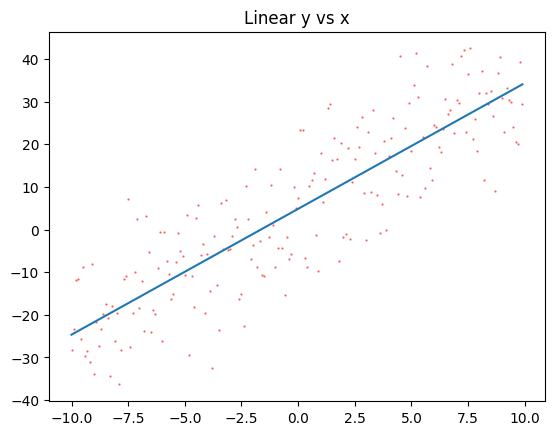

In [2]:
x = np.arange(-10,10,0.1)
y = 3*x + 5 + np.random.normal(0,10,len(x))

m,b = np.polyfit(x,y,1)
y_fit = np.poly1d((m,b))(x)
plt.scatter(x,y, color="red", alpha=0.5, s=0.5)
plt.plot(x,y_fit); # note the semicolon here. what does it do?
plt.title("Linear y vs x");

And find $r$ and $m$

In [3]:
print(m)
np.corrcoef(x,y)

2.9487249217674503


array([[1.        , 0.86163938],
       [0.86163938, 1.        ]])

## Exponential Regression

If we believe $y = Ca^x$ then by regressing $x$ against $\ln y$ we can determine $a$.

$$
\begin{array}{rl}
y &=& Ca^x \\
\ln y &=& \ln C + x \ln a \\
\end{array}
$$

This is a line with slope $\ln a$ and intercept $\ln C$

In [4]:
x = np.arange(3,5,0.01)
y = 0.25*3**x

# add noise, but keep y > 0
for i in range(len(y)):
    while True:
        noise  = random.gauss(0,y[i]/10)
        if (y[i]+noise > 0):
            break
    y[i] += noise

plt.scatter(x,y,s=0.5);
plt.title("Exponential correlation");

NameError: name 'random' is not defined

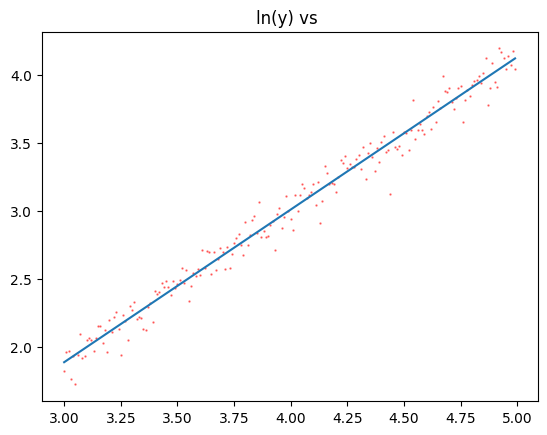

In [68]:
# transform y
y_t = np.log(y) ## this is ln

m,b = np.polyfit(x,y_t,1)
y_fit = np.poly1d((m,b))(x)
plt.scatter(x,y_t, color="red", alpha=0.5, s=0.5)
plt.plot(x,y_fit);
plt.title("ln(y) vs ");

And find $r$ and $a$ and $C$

In [53]:
print("base = " , np.exp(m))
print("C = ", np.exp(b))
print(f"r = {np.corrcoef(x,y)[1,0]}")

base =  2.9975765382313955
C =  0.24812105741218246
r = 0.95069612414204


## Log-Log Regression

If we believe $y = Cx^k$ then by regressing $\ln x$ against $\ln y$ we can determine $k$.

$$
\begin{array}{rl}
y &=& Cx^k \\
\ln y &=& \ln C + k \ln x \\
\end{array}
$$

This is a line with slope $k$ and intercept $\ln C$

In [54]:
import random

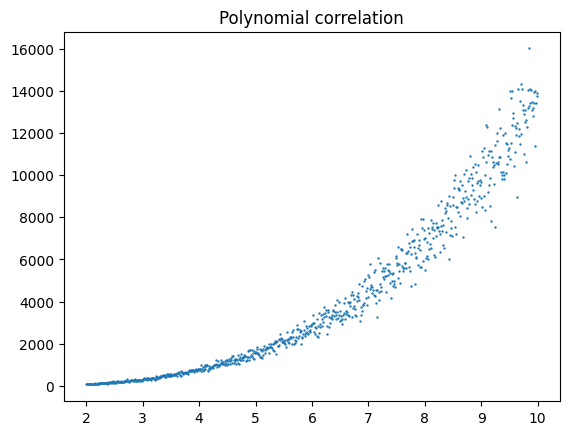

In [69]:
x = np.arange(2,10,0.01)
y = 10*x**3.14
for i in range(len(y)):
    while True:
        noise  = random.gauss(0,y[i]/10)
        if (y[i]+noise > 0):
            break
    y[i] += noise
plt.scatter(x,y,s=0.5);
plt.title("Polynomial correlation");

73.2177132494846


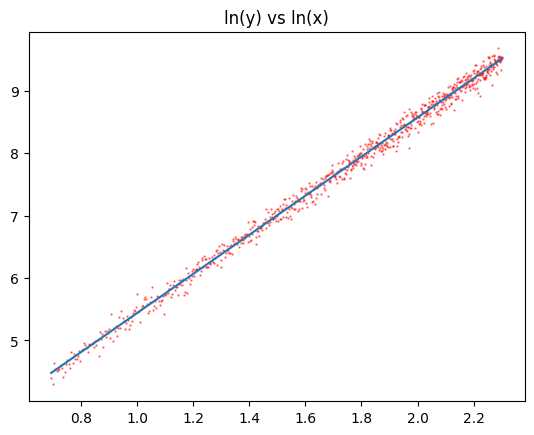

In [70]:
# check y for 0
print(np.min(y))

# transform y and x
x_t = np.log(x)
y_t = np.log(y)

m,b = np.polyfit(x_t,y_t,1)
y_fit = np.poly1d((m,b))(x_t)
plt.scatter(x_t,y_t, color="red", alpha=0.5, s=0.5)
plt.plot(x_t,y_fit);
plt.title("ln(y) vs ln(x)");

And find $r$ and $a$ and $C$

In [71]:
print("degree = " , m)
print("C = ", np.exp(b))
print(f"r = {np.corrcoef(x,y)[1,0]}")

degree =  3.133547086987462
C =  10.03662528625072
r = 0.9376281240390777
